In [5]:
import glob
from tqdm import tqdm
import numpy as np
import pickle
dirs = glob.glob('/home/mdelafuente/SSL/out_directory/*')

In [7]:
with (open(dirs[0], "rb")) as openfile:
        load = pickle.load(openfile)

In [9]:
load['md_cols']

,name,value,fid,sid,version,name_fid,prod
0,W1-W2,nan,,ZTF,1.0.0,W1-W2,W1_W2
1,W2-W3,nan,,ZTF,1.0.0,W2-W3,W2_W3
2,W3-W4,nan,,ZTF,1.0.0,W3-W4,W3_W4
0,sgscore1,NaN,,panstarrs,1.0.1,sgscore1,sgscore1
2,ps_g-r,NaN,,panstarrs,1.0.1,ps_g-r,ps_g_r


In [ ]:

r_band_zero_counter = 0
g_band_zero_counter = 0
ft_nans = []
md_nans = []
len_g = []
len_r = []

for dir in tqdm(dirs, total = len(dirs)):
    with (open(dir, "rb")) as openfile:
        load = pickle.load(openfile)
        if load['flux'].sum(axis =0 )[0] == 0:
            g_band_zero_counter +=1
        else:
            len_g.append((load['flux']!=0).sum(axis =0 )[0])
        if load['flux'].sum(axis =0 )[1] == 0:
            r_band_zero_counter +=1
        else:
            len_r.append((load['flux']!=0).sum(axis =0 )[1])
        ft_nans.append(load['ft_cols'].isna().sum())
        md_nans.append(load['md_cols'].isna().sum())

100%|██████████| 216416/216416 [04:17<00:00, 840.22it/s]


In [3]:

print(f'For a total of {len(dirs)} object, {g_band_zero_counter} have zero observations in the g band, and {r_band_zero_counter} have zero observations in the r band')
print(f'For a total of {len(dirs)} object, the mean nan per objects for the features is {np.mean(ft_nans)} and the mean nan per object for the metadata is {np.mean(md_nans)}')

print(f'{np.mean(len_g)} +/- {np.std(len_g)}')
print(f'{np.mean(len_r)}+/- {np.std(len_r)}')

For a total of 216416 object, 23084 have zero observations in the g band, and 20617 have zero observations in the r band
For a total of 216416 object, the mean nan per objects for the features is 11.900138093829872 and the mean nan per object for the metadata is 0.2857142857142857
17.502250015517347 +/- 27.980338344959097
18.822118601218598+/- 30.510494055199874


<Axes: ylabel='Count'>

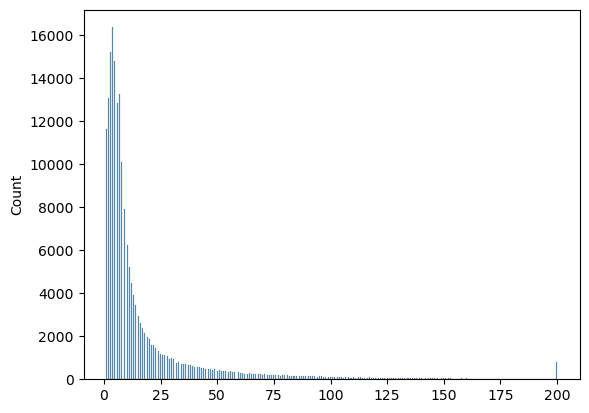

In [4]:
import seaborn as sns

sns.histplot(len_g)

<Axes: ylabel='Count'>

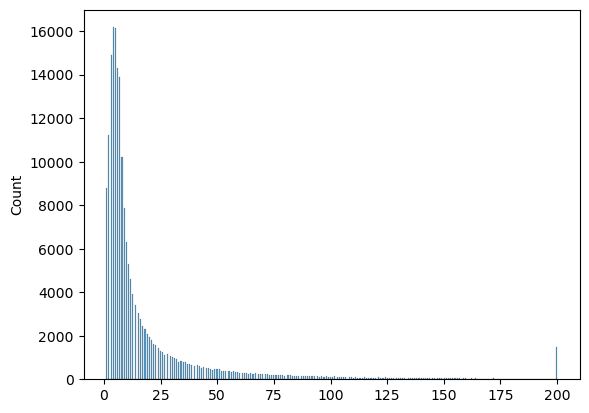

In [5]:
sns.histplot(len_r)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize = (15,5))
sns.heatmap(load['flux'],ax = ax[0], cmap='plasma')
sns.heatmap(load['time'],ax = ax[1], cmap='plasma')
sns.heatmap(load['mask'],ax = ax[2], cmap='plasma')

In [58]:
import h5py
with h5py.File('/home/mdelafuente/SSL/final_dataset/no_contamination.h5', 'r') as f:
    # Print original dictionary keys
    
    # Print HDF5 root level keys
    print("HDF5 root level keys:", list(f.keys()))
    these_idx = f.get('validation_0')[:100]
    #print(these_idx)
    feats = f.get('md_cols')[these_idx]

HDF5 root level keys: ['flux', 'ft_cols', 'mask', 'md_cols', 'time', 'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'validation_0', 'validation_1', 'validation_2', 'validation_3', 'validation_4']


In [59]:
feats

array([[[-2.900e-02],
        [ 9.890e-01],
        [ 3.258e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[-5.000e-03],
        [ 4.940e-01],
        [ 3.650e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[-7.200e-02],
        [ 7.380e-01],
        [ 3.497e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[ 4.800e-02],
        [ 2.762e+00],
        [ 3.511e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan],
        [       nan]],

       [[-4.200e-02],
        [ 7.300e-01],
        [ 3.593e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[-9.000e-03],
        [ 1.930e-01],
        [ 3.797e+00],
        [       nan],
        [       nan],
        [       nan]],

       [[ 3.600e-02],
        [ 4.550e-01],
        [ 3.556e+0

In [60]:
import pandas as pd
from joblib import load
QT = load('/home/mdelafuente/pipeline/pipeline/training/lc_classifier_ztf/ATAT_ALeRCE/data/datasets/h5file/quantiles/metadata/md_qt-fold-0.joblib')
df = pd.DataFrame(feats.reshape(feats.shape[0],feats.shape[1]))
df = QT.transform(df.fillna(12345)) + 0.1
df = pd.DataFrame(df.reshape(df.shape[0],df.shape[1]) )
df = df.fillna(0)
df = df.values.reshape(df.shape[0],df.shape[1],1) 


/home/mdelafuente/miniconda3/envs/ATAT/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator QuantileTransformer from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [61]:
df

array([[[0.51041041],
        [0.53781219],
        [0.71061061],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.65505506],
        [0.42732733],
        [0.95685686],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.29219219],
        [0.48320733],
        [0.85775776],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.76766767],
        [0.8609324 ],
        [0.86576577],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.1       ],
        [1.1       ],
        [1.1       ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.42632633],
        [0.48098098],
        [0.92182182],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.63753754],
        [0.3285619 ],
        [1.02372881],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.75365365],
        [0.4170288 ],
        [0.8992993

In [62]:
import torch
tabular_data = torch.from_numpy(df)

In [63]:
tabular_data.shape

torch.Size([100, 6, 1])

In [64]:
class GaussianNoise: 
    def __call__(self, sample):
        x = sample['metadata_feat']  # Shape: [bs, seqlen, channels]
        mask = (x != 0)  # Mask for non-zero values
        self.mean = 0 #torch.rand(1).to(device = x.device).item()
        self.std =  torch.FloatTensor(1).uniform_(0, 0.1).to(device = x.device).item()
        # Generate Gaussian noise for each channel independently
        noise = torch.normal(self.mean, self.std, size=x.shape).to(device = x.device)
         
        # Apply noise only to the non-
        # zero values
        x_with_noise = x + noise * mask
        x_with_noise = torch.clip(x_with_noise, 0,1.1)
        sample['metadata_feat'] = x_with_noise
        return sample

In [65]:
input_dict ={'metadata_feat':tabular_data}

<Axes: >

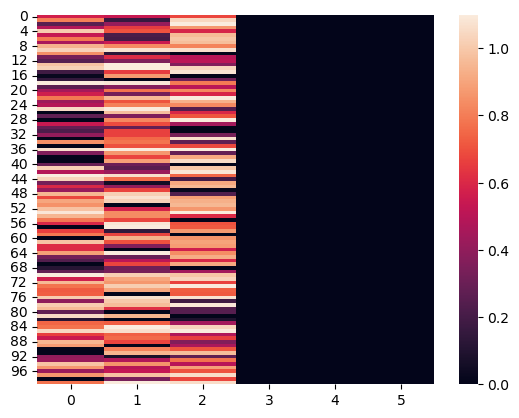

In [73]:
from torchvision.transforms import Compose
 

transform = Compose([GaussianNoise()])


transform(input_dict)['metadata_feat'].squeeze(-1)[:100].shape

import seaborn as sns

sns.heatmap(transform(input_dict)['metadata_feat'].squeeze(-1)[:100])